## Calculate the optimal number of cluster for YOLO

### Submitted by Deepak Hazarika  , Parinita Bora , Gurudatta


### Import the required libraries




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time;

localtime = time.asctime(time.localtime(time.time()))
print ("Local current time :", localtime)

Local current time : Sun Oct 18 06:19:28 2020


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import csv
import re
from PIL import Image
import numpy as np
import math 

## Initialize the constatnts
Number of grid cells = 13 x 13

In [5]:
GRID_X = 13.0
GRID_Y = 13.0

### Find the image file size for use during annotation
Store the image file size in a dictionary for later use


In [6]:
import glob, os

img_path = '/content/drive/My Drive/EVA5/S12/Yolo_image/'

yolo_Dict = {}

for root, dirs, files in os.walk(img_path):
    print(root)
    for file in files:
        if file.endswith(".jpg"):
            file_path = os.path.join(root,file)
            img = Image.open(file_path , mode= 'r')
            #print(" path {} shape {}".format(file_path , img.size))
            imgDict = {}
            imgDict = {'Img_X': img.size[0] , 'Img_Y': img.size[1]} 
            yolo_Dict[file] = imgDict



/content/drive/My Drive/EVA5/S12/Yolo_image/


In [7]:
yolo_Dict

{'img_1.jpg': {'Img_X': 290, 'Img_Y': 174},
 'img_10.jpg': {'Img_X': 866, 'Img_Y': 1390},
 'img_11.jpg': {'Img_X': 425, 'Img_Y': 319},
 'img_12.jpg': {'Img_X': 1300, 'Img_Y': 956},
 'img_13.jpg': {'Img_X': 626, 'Img_Y': 417},
 'img_14.jpg': {'Img_X': 626, 'Img_Y': 417},
 'img_15.jpg': {'Img_X': 474, 'Img_Y': 315},
 'img_16.jpg': {'Img_X': 580, 'Img_Y': 373},
 'img_17.jpg': {'Img_X': 474, 'Img_Y': 348},
 'img_18.jpg': {'Img_X': 474, 'Img_Y': 237},
 'img_19.jpg': {'Img_X': 626, 'Img_Y': 417},
 'img_2.jpg': {'Img_X': 279, 'Img_Y': 181},
 'img_20.jpg': {'Img_X': 800, 'Img_Y': 521},
 'img_21.jpg': {'Img_X': 1068, 'Img_Y': 1689},
 'img_22.jpg': {'Img_X': 626, 'Img_Y': 417},
 'img_23.jpg': {'Img_X': 299, 'Img_Y': 470},
 'img_24.jpg': {'Img_X': 353, 'Img_Y': 470},
 'img_25.jpg': {'Img_X': 1500, 'Img_Y': 1101},
 'img_26.jpg': {'Img_X': 1697, 'Img_Y': 1131},
 'img_27.jpg': {'Img_X': 474, 'Img_Y': 474},
 'img_28.jpg': {'Img_X': 1440, 'Img_Y': 900},
 'img_29.jpg': {'Img_X': 1300, 'Img_Y': 1049},
 

## Load the annotated json file

In [8]:
import json 

filepath = '/content/drive/My Drive/EVA5/S12/'

# Opening JSON file 
f = open(filepath + 'via_project_18Oct2020_S12.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  


In [9]:
data

{'_via_attributes': {'file': {},
  'region': {'yolo_class': {'default_options': {},
    'description': '',
    'options': {'boots': '', 'hardhat': '', 'mask': '', 'vest': ''},
    'type': 'dropdown'}}},
 '_via_data_format_version': '2.0.10',
 '_via_image_id_list': ['img_2.jpg8638',
  'img_3.jpg335515',
  'img_4.jpg199861',
  'img_36.jpg10319',
  'img_37.jpg9779',
  'img_38.jpg5829',
  'img_39.jpg33471',
  'img_40.jpg871995',
  'img_1.jpg13811',
  'img_10.jpg258039',
  'img_11.jpg121861',
  'img_41.jpg123143',
  'img_9.jpg85847',
  'img_5.jpg168220',
  'img_6.jpg107155',
  'img_13.jpg68075',
  'img_14.jpg65440',
  'img_15.jpg23900',
  'img_7.jpg82936',
  'img_42.jpg1391938',
  'img_16.jpg24405',
  'img_8.jpg23122',
  'img_17.jpg23042',
  'img_20.jpg62635',
  'img_43.jpg65661',
  'img_50.jpg78147',
  'img_51.jpg37746',
  'img_52.jpg26352',
  'img_22.jpg87001',
  'img_19.jpg62438',
  'img_44.jpg113658',
  'img_58.jpg85944',
  'img_21.jpg127268',
  'img_18.jpg21894',
  'img_23.jpg30113',
 

## Parse the json object and extract the following

The image file name , bounding box width and height and the class and store in a dataframe

[
{'shape_attributes': {'name': 'rect', 'x': 33, 'y': 131, 'width': 43, 'height': 62}, 
'region_attributes': {'': 'boot1', 'dropdown': 'boot'}
}, 

In [10]:
# Iterating through the json 
# list 
json_img_name = []
json_box_width = []
json_box_height = []
json_box_class = []

for i in data['_via_img_metadata']: 
    itok = i.split('.')
    itok[1] = itok[1][:3]
    itok = '.'.join(itok)
    print(itok)
    #print(data['_via_img_metadata'][i]['regions'])
    for j in range(len(data['_via_img_metadata'][i]['regions'])):
        print(" region {} ".format( data['_via_img_metadata'][i]['regions'][j]))
        region = data['_via_img_metadata'][i]['regions'][j]
        shape_attrib_width = region['shape_attributes']['width']
        shape_attrib_height = region['shape_attributes']['height']
        region_attrib_class = region['region_attributes']['yolo_class']
        #print("name {} class {} box_w {} box_h {}".format(itok, region_attrib_class ,shape_attrib_width ,shape_attrib_height))
        
        json_img_name.append(itok)
        json_box_width.append(shape_attrib_width)
        json_box_height.append(shape_attrib_height)
        json_box_class.append(region_attrib_class)
          
assert (len(json_img_name) == len(json_box_width) == len(json_box_height) == len(json_box_class))
jsonImgDict = {'Img_name': json_img_name, 'Box_width': json_box_width , 'Box_height': json_box_height, 'Box_class': json_box_class}            
jsonDF = pd.DataFrame(data = jsonImgDict)
            
# Closing file 
f.close() 

img_2.jpg
 region {'shape_attributes': {'name': 'rect', 'x': 18, 'y': 57, 'width': 72, 'height': 68}, 'region_attributes': {'yolo_class': 'mask'}} 
 region {'shape_attributes': {'name': 'rect', 'x': 100, 'y': 81, 'width': 26, 'height': 30}, 'region_attributes': {'yolo_class': 'mask'}} 
 region {'shape_attributes': {'name': 'rect', 'x': 179, 'y': 127, 'width': 26, 'height': 23}, 'region_attributes': {'yolo_class': 'mask'}} 
img_3.jpg
 region {'shape_attributes': {'name': 'rect', 'x': 299, 'y': 87, 'width': 38, 'height': 26}, 'region_attributes': {'yolo_class': 'mask'}} 
 region {'shape_attributes': {'name': 'rect', 'x': 456, 'y': 52, 'width': 44, 'height': 31}, 'region_attributes': {'yolo_class': 'mask'}} 
 region {'shape_attributes': {'name': 'rect', 'x': 584, 'y': 137, 'width': 55, 'height': 36}, 'region_attributes': {'yolo_class': 'mask'}} 
 region {'shape_attributes': {'name': 'rect', 'x': 756, 'y': 76, 'width': 64, 'height': 42}, 'region_attributes': {'yolo_class': 'mask'}} 
 regio

### set the image file size for each bounding box

in the dataframe

In [11]:
jsonDF

,Img_name,Box_width,Box_height,Box_class
0,img_2.jpg,72,68,mask
1,img_2.jpg,26,30,mask
2,img_2.jpg,26,23,mask
3,img_3.jpg,38,26,mask
4,img_3.jpg,44,31,mask
...,...,...,...,...
262,img_75.jpg,95,49,boots
263,img_75.jpg,76,49,boots
264,img_12.jpg,207,195,mask
265,img_12.jpg,344,207,hardhat


In [13]:
img_width = []
img_height = []
for i, row in jsonDF.iterrows():
    print( "img {} dim {}".format(row['Img_name'] , yolo_Dict[row['Img_name']]))
    img_width.append(yolo_Dict[row['Img_name']]['Img_X'])
    img_height.append(yolo_Dict[row['Img_name']]['Img_Y'])
    
assert (len(img_width) == len(img_height) == len(jsonDF))


jsonDF["Image_width"] = img_width
jsonDF["Image_height"] = img_height

img img_2.jpg dim {'Img_X': 279, 'Img_Y': 181}
img img_2.jpg dim {'Img_X': 279, 'Img_Y': 181}
img img_2.jpg dim {'Img_X': 279, 'Img_Y': 181}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_3.jpg dim {'Img_X': 1020, 'Img_Y': 573}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img img_4.jpg dim {'Img_X': 960, 'Img_Y': 707}
img i

### Normalize the bounding box width and height w.r.t image width and height 
This will help in comparing the bounding box for images of different size

In [15]:
jsonDF["Box_norm_width"]  = jsonDF['Box_width']/ jsonDF['Image_width']
jsonDF["Box_norm_height"]  = jsonDF['Box_height']/ jsonDF['Image_height']


In [16]:
jsonDF["Box_X"] =((jsonDF['Box_width']/ jsonDF['Image_width'])*GRID_X)
jsonDF["Box_Y"] = ((jsonDF['Box_height']/ jsonDF['Image_height'])*GRID_Y)


### Translate the centroid of the bounding box to a cell location in a 13 x 13 grid

In [17]:
jsonDF["Box_X"] = [math.ceil(x) for x in jsonDF["Box_X"]]
jsonDF["Box_Y"] = [math.ceil(x) for x in jsonDF["Box_Y"]]

### Extract the normalized location of bounding box from the dataframe
This is fed to the K Means calculator

In [18]:
feedTOKMeans = np.asarray([[jsonDF['Box_norm_width'][i] , jsonDF['Box_norm_height'][i]] for i in range(len(jsonDF['Box_norm_width']))])

In [19]:
feedTOKMeans

array([[0.25806452, 0.37569061],
       [0.09318996, 0.16574586],
       [0.09318996, 0.12707182],
       [0.0372549 , 0.04537522],
       [0.04313725, 0.05410122],
       [0.05392157, 0.06282723],
       [0.0627451 , 0.07329843],
       [0.01666667, 0.02443281],
       [0.03823529, 0.06457243],
       [0.08039216, 0.04712042],
       [0.04313725, 0.06457243],
       [0.03958333, 0.04243281],
       [0.0375    , 0.03253182],
       [0.04375   , 0.03536068],
       [0.04895833, 0.04526167],
       [0.04791667, 0.03960396],
       [0.03541667, 0.04101839],
       [0.071875  , 0.03536068],
       [0.06145833, 0.04950495],
       [0.11354167, 0.07072136],
       [0.07395833, 0.07355021],
       [0.09895833, 0.05374823],
       [0.05208333, 0.03253182],
       [0.16727273, 0.20765027],
       [0.16363636, 0.24590164],
       [0.12363636, 0.20218579],
       [0.10909091, 0.12568306],
       [0.10909091, 0.20218579],
       [0.57333333, 0.47111111],
       [0.33454545, 0.24590164],
       [0.

### Plot the coordinates of the bounding box in a scatter plot for inspection

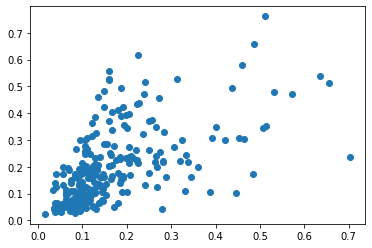

In [20]:

plt.scatter(jsonDF['Box_norm_width'], jsonDF['Box_norm_height'])

### Find the optimum number of cluster for the given data shape by plotting the kmeans inertia vs number of cluster
The plot is shaped like an elbow , the optimal number of cluster is at the elbow of the plot.

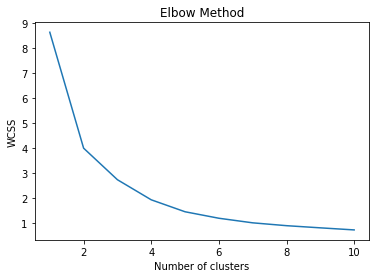

In [21]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(feedTOKMeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Plot the cluster center for 5 clusters
Data is concentrated close to the first cluster

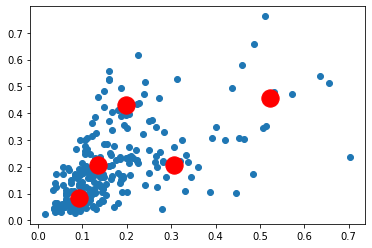

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(feedTOKMeans)

plt.scatter(feedTOKMeans[:,0], feedTOKMeans[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [23]:
kmx = kmeans.cluster_centers_[:, 0]
kmy = kmeans.cluster_centers_[:, 1]
kmx

array([0.13465828, 0.19855866, 0.52370644, 0.30627308, 0.09224879])

### Calculate the Intersection Over Union for each cluster w.r.t a given coordinate and chose the cluster which has maximum IoU

In [24]:

cluster = []
for i in range(len(jsonDF)):
    IoU = []
    for j in range(len(kmx)):
        minx = min(jsonDF['Box_norm_width'][i],kmx[j])
        miny = min(jsonDF['Box_norm_height'][i],kmy[j])
        maxx = max(jsonDF['Box_norm_width'][i],kmx[j])
        maxy = max(jsonDF['Box_norm_height'][i],kmy[j])
        
        IoU.append((min(jsonDF['Box_norm_width'][i],kmx[j])*min(jsonDF['Box_norm_height'][i],kmy[j]))/(max(jsonDF['Box_norm_width'][i],kmx[j])*max(jsonDF['Box_norm_height'][i],kmy[j])))
        #print(" bwid {} , kmx {} bhgt {} kmy {}".format(jsonDF['Box_norm_width'][i],kmx[j],jsonDF['Box_norm_height'][i],kmy[j]))
        #print("\n minx {} miny {} maxx {} maxy {} \n inter {} unin {} iou {}".format(minx , miny,maxx , maxy , min(jsonDF['Box_norm_width'][i],kmx[j])*min(jsonDF['Box_norm_height'][i],kmy[j]) ,(max(jsonDF['Box_norm_width'][i],kmx[j])*max(jsonDF['Box_norm_height'][i],kmy[j])) ))
    #print(" iou {} max{} indx {}".format(IoU , max(IoU) , IoU.index(max(IoU)) ))
    
    cluster.append(IoU.index(max(IoU)))
    
jsonDF["Cluster"] = cluster

### Store the cluster information in the dataframe

In [25]:
jsonDF["Cluster_centers"] = [kmeans.cluster_centers_ for i in range(len(jsonDF))]

### Show the final dataframe

In [26]:
jsonDF

,Img_name,Box_width,Box_height,Box_class,Image_width,Image_height,Box_norm_width,Box_norm_height,Box_X,Box_Y,Cluster,Cluster_centers
0,img_2.jpg,72,68,mask,279,181,0.258065,0.375691,4,5,1,"[[0.13465827568856673, 0.2058621437484318], [0..."
1,img_2.jpg,26,30,mask,279,181,0.093190,0.165746,2,3,0,"[[0.13465827568856673, 0.2058621437484318], [0..."
2,img_2.jpg,26,23,mask,279,181,0.093190,0.127072,2,2,4,"[[0.13465827568856673, 0.2058621437484318], [0..."
3,img_3.jpg,38,26,mask,1020,573,0.037255,0.045375,1,1,4,"[[0.13465827568856673, 0.2058621437484318], [0..."
4,img_3.jpg,44,31,mask,1020,573,0.043137,0.054101,1,1,4,"[[0.13465827568856673, 0.2058621437484318], [0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
262,img_75.jpg,95,49,boots,800,519,0.118750,0.094412,2,2,4,"[[0.13465827568856673, 0.2058621437484318], [0..."
263,img_75.jpg,76,49,boots,800,519,0.095000,0.094412,2,2,4,"[[0.13465827568856673, 0.2058621437484318], [0..."
264,img_12.jpg,207,195,mask,1300,956,0.159231,0.203975,3,3,0,"[[0.13465827568856673, 0.2058621437484318], [0..."
265,img_12.jpg,344,207,hardhat,1300,956,0.264615,0.216527,4,3,3,"[[0.13465827568856673, 0.2058621437484318], [0..."


### Save the dataframe 

In [27]:
jsonDF.to_csv(filepath + 'S12_Assignment_Solution_cluster.csv', index= False)